In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\VISHAL SSN\deeplearning\DL\EX1\titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df.drop(columns=["Age", "Embarked", "Cabin"])

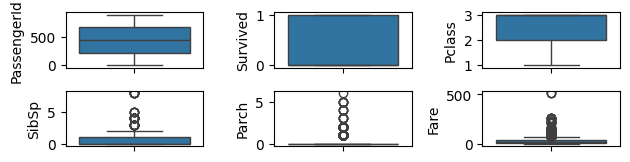

In [7]:
numerical_cols = df.select_dtypes(include="number").columns

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [8]:
outlier_cols = ["Fare", "Parch", "SibSp"]

Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[outlier_cols] = np.where(df[outlier_cols] < lower_bound, lower_bound,
                           np.where(df[outlier_cols] > upper_bound, upper_bound,
                                   df[outlier_cols]))

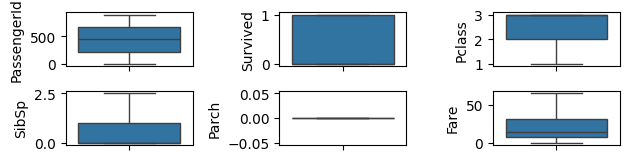

In [9]:
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [10]:
df = df.drop(columns="Parch")

In [11]:
categorical_columns = df.select_dtypes(include="object").columns.tolist()
df_encoded = df.copy()

for col in categorical_columns:
  dic = {}
  unique_values = df[col].unique()
  value = 0
  for unique in unique_values:
    dic[unique] = value
    value += 1
  df_encoded[col] = df_encoded[col].map(dic)

<Axes: >

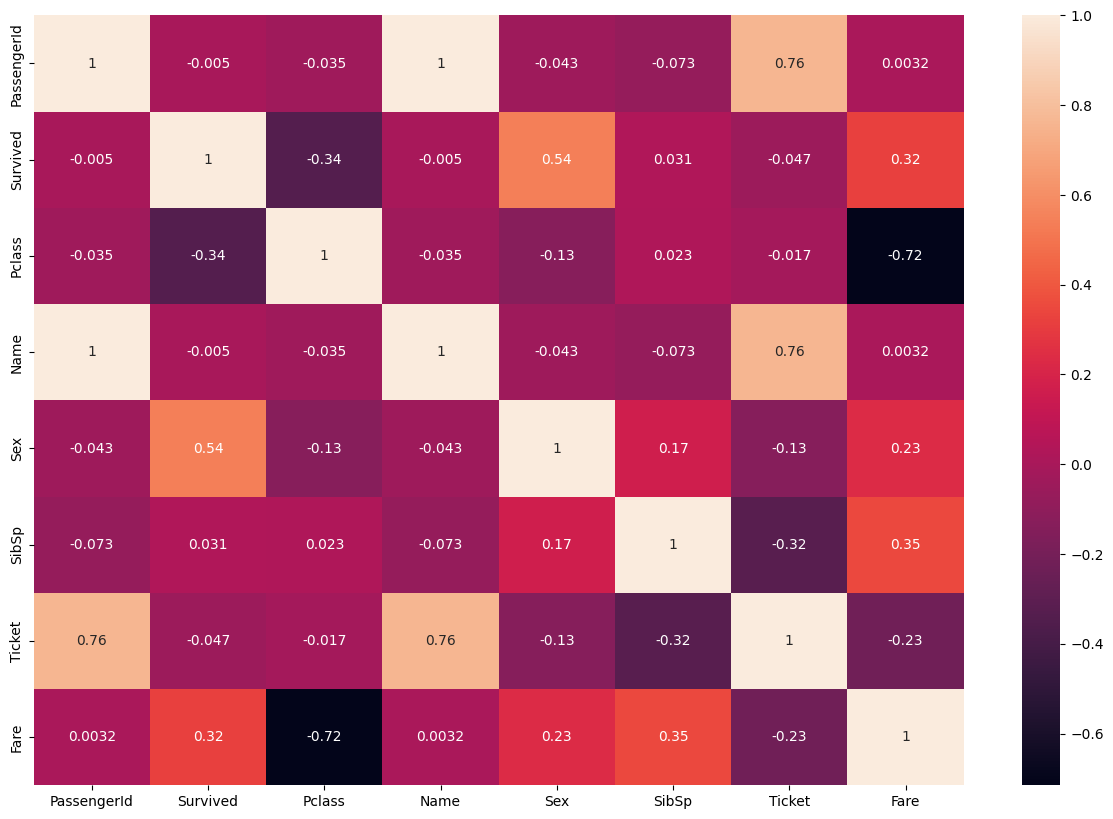

In [12]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score

features = ["Pclass", "Sex", "Fare"]
x = df_encoded[features]
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))
print("F1-score: ", f1_score(y_test, y_predict))

Accuracy:  0.7821229050279329
Precision:  0.7536231884057971
F1-score:  0.7272727272727273
